-------------------------------------------------------
          種類     価格情報区分   地域  市区町村コード 都道府県名 市区町村名  地区名 最寄駅：名称 最寄駅：距離（分）  \
0  宅地(土地と建物)  不動産取引価格情報  商業地    13101   東京都  千代田区  飯田橋    飯田橋         4   
1  宅地(土地と建物)  不動産取引価格情報  商業地    13101   東京都  千代田区  飯田橋    飯田橋         1   
2  宅地(土地と建物)  不動産取引価格情報  商業地    13101   東京都  千代田区  飯田橋    飯田橋         2   
3  宅地(土地と建物)  不動産取引価格情報  商業地    13101   東京都  千代田区  飯田橋    飯田橋         2   
4  宅地(土地と建物)  不動産取引価格情報  商業地    13101   東京都  千代田区  飯田橋    飯田橋         1   

      取引価格（総額）  ...        用途 今後の利用目的  前面道路：方位 前面道路：種類 前面道路：幅員（ｍ） 都市計画  \
0  340000000.0  ...        住宅      住宅       南東      区道        4.0   商業   
1  890000000.0  ...       事務所     事務所       北東      区道       11.0   商業   
2  880000000.0  ...    事務所、店舗     事務所       南西      区道        6.0   商業   
3  400000000.0  ...    事務所、店舗      店舗       北西      区道        4.0   商業   
4  180000000.0  ...  共同住宅、事務所     NaN       南西      都道       27.0   商業   

  建ぺい率（％） 容積率（％）        取引時期 取引の事情等  
0    80.0 

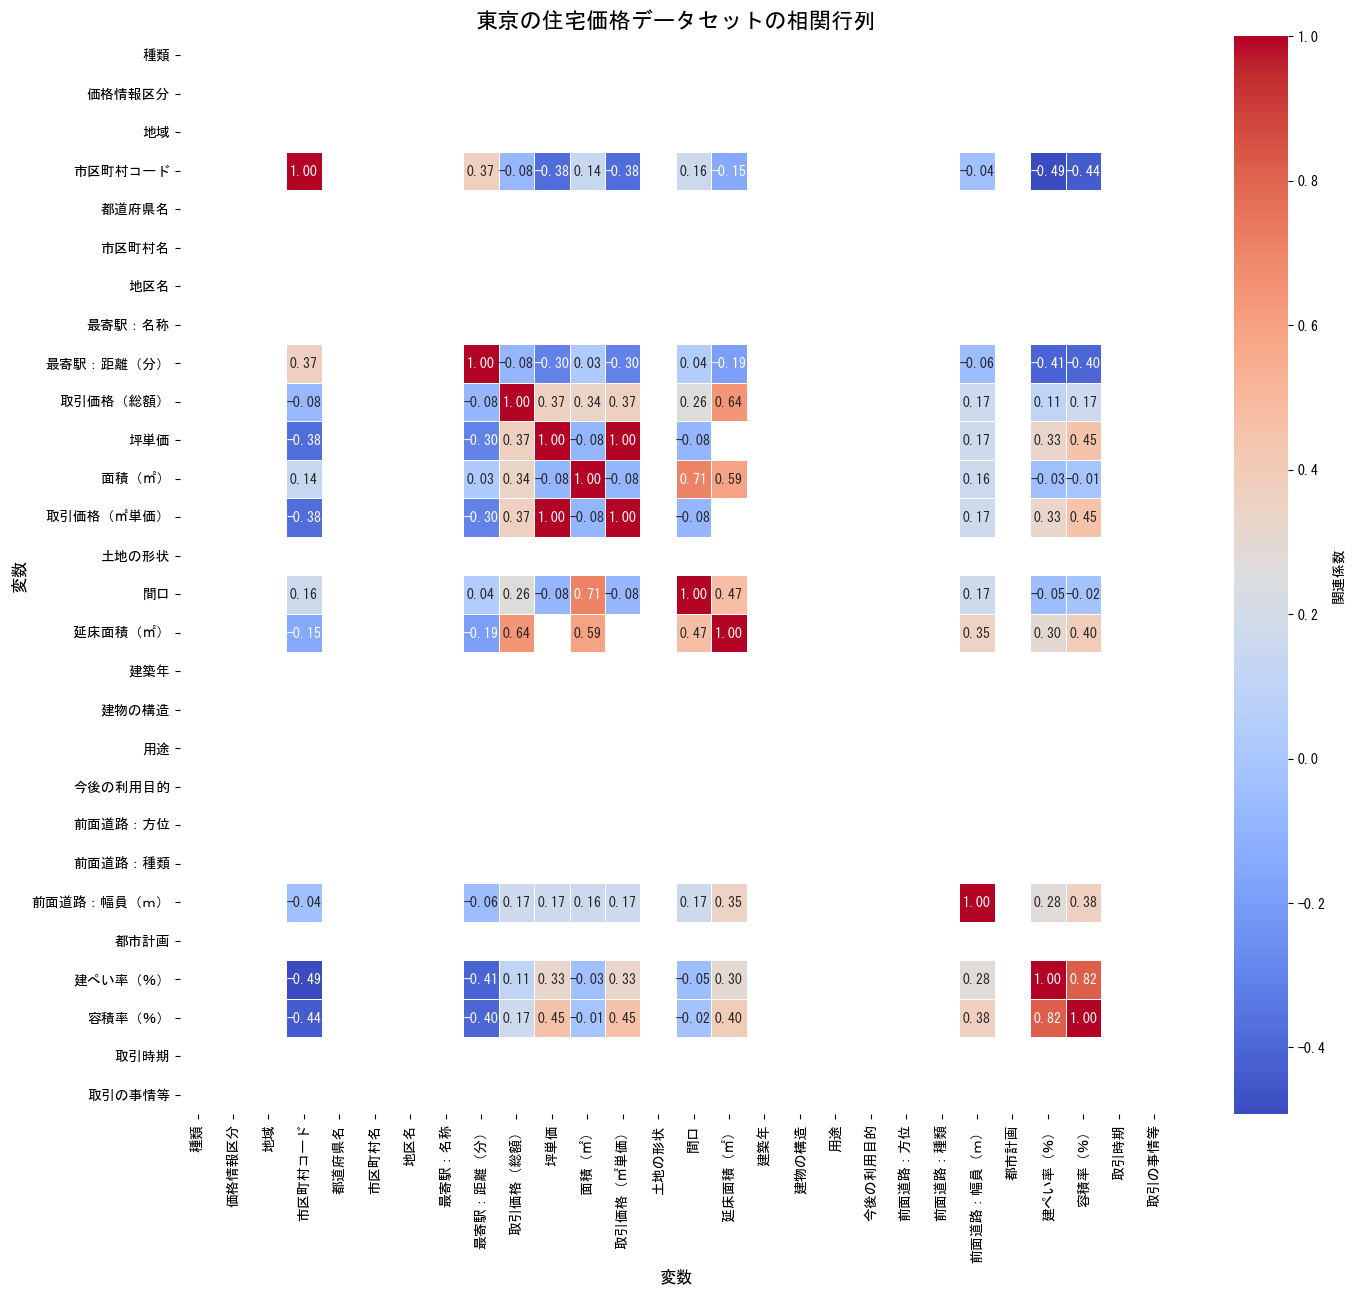

整理后的相关性数据已保存到: C:\Users\10075\Downloads\Ai-Study\DataSet\Tokyo_house_price_correlation.csv


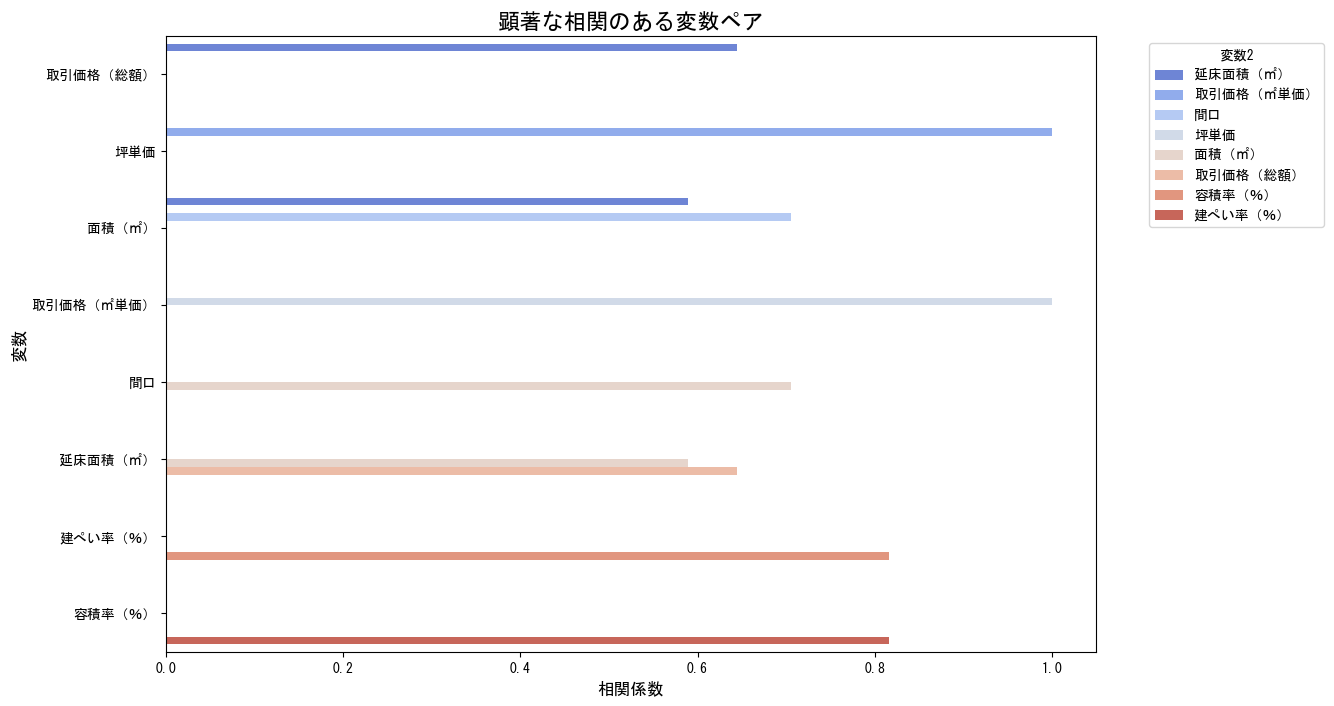

In [21]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt  # 数据可视化
import pandas as pd  # 数据处理和分析
import numpy as np  # 科学计算
import time # 测量代码段的执行时间
import seaborn as sns

from sklearn.pipeline import Pipeline # 管理机器学习工作流程
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV  # 数据划分、交叉验证、学习曲线、网格搜索
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  # 数据标准化、多项式特征
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # 回归模型
from sklearn.svm import SVR  # 支持向量回归
from sklearn.ensemble import RandomForestRegressor  # 随机森林回归
from sklearn.metrics import mean_squared_error, r2_score  # 模型评估
from matplotlib import font_manager
# 影响因素


# 加载数据集
file_path = 'C:\\Users\\10075\\Downloads\\Ai-Study\\DataSet\\Tokyo house price.csv'
tokyo_house_data = pd.read_csv(file_path, encoding='cp932')

# 显示数据集的基本信息
print('-------------------------------------------------------')
print(tokyo_house_data .head())  # 显示数据集前几行
print('-------------------------------------------------------')
print(tokyo_house_data .info())  # 显示数据集基本信息_如列数、列名、非空值数量、数据类型等
print('-------------------------------------------------------')
print(tokyo_house_data .describe())  # 显示数据集描述性统计信息
print('-------------------------------------------------------')
print(tokyo_house_data .isnull().sum())  # 检查数据集中各列的缺失值数量_计算每列的缺失值数量
print('-------------------------------------------------------')
# 数值列
numeric_columns = ['種類', '価格情報区分', '地域', '市区町村コード', '都道府県名', '市区町村名', '地区名', '最寄駅：名称','最寄駅：距離（分）', '取引価格（総額）', '坪単価', '面積（㎡）', '取引価格（㎡単価）', '土地の形状', '間口','延床面積（㎡）', '建築年', '建物の構造', '用途', '今後の利用目的', '前面道路：方位', '前面道路：種類','前面道路：幅員（ｍ）', '都市計画', '建ぺい率（％）', '容積率（％）', '取引時期', '取引の事情等']

# 打印每一列的唯一值和唯一值的数量
for column in numeric_columns:
    unique_values = tokyo_house_data[column].unique()
    unique_count = tokyo_house_data[column].nunique()
    print(f"{column}: 有 {unique_count} 个唯一值。")
    print(f"这些唯一值是: {unique_values}")
    print()


# 转换为数值类型
tokyo_house_data[numeric_columns] = tokyo_house_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# 计算相关矩阵
correlation_matrix = tokyo_house_data[numeric_columns].corr()

# 打印完整的相关性矩阵
print("相关性矩阵:")
print(correlation_matrix)

# 设置日文字体为Windows系统自带的MS Gothic字体
plt.rcParams['font.sans-serif'] = ['MS Gothic']
plt.rcParams['axes.unicode_minus'] = False

# 创建热图
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'label': '関連係数'})

# 设置图表标题和轴标签为日文
plt.title('東京の住宅価格データセットの相関行列', fontsize=16)
plt.xlabel('変数', fontsize=12)
plt.ylabel('変数', fontsize=12)

# 设置x轴和y轴的刻度标签为日文
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 将相关性矩阵整理成适合输出的格式
correlation_pairs = correlation_matrix.stack().reset_index()
correlation_pairs.columns = ['变量1', '变量2', '相关系数']
correlation_pairs = correlation_pairs[correlation_pairs['变量1'] != correlation_pairs['变量2']]
correlation_pairs = correlation_pairs[correlation_pairs['相关系数'].abs() > 0.5]

# 将整理后的相关性对输出为CSV文件
output_file_path = 'C:\\Users\\10075\\Downloads\\Ai-Study\\DataSet\\Tokyo_house_price_correlation.csv'
correlation_pairs.to_csv(output_file_path, index=False)

print(f"整理后的相关性数据已保存到: {output_file_path}")


# 读取整理后的相关性数据
output_file_path = 'C:\\Users\\10075\\Downloads\\Ai-Study\\DataSet\\Tokyo_house_price_correlation.csv'
correlation_pairs = pd.read_csv(output_file_path)

# 设置日文字体为Windows系统自带的MS Gothic字体
plt.rcParams['font.sans-serif'] = ['MS Gothic']
plt.rcParams['axes.unicode_minus'] = False

# 可视化相关性对
plt.figure(figsize=(12, 8))
sns.barplot(x='相关系数', y='变量1', hue='变量2', data=correlation_pairs, palette='coolwarm')
plt.title('顕著な相関のある変数ペア', fontsize=16)
plt.xlabel('相関係数', fontsize=12)
plt.ylabel('変数', fontsize=12)

plt.legend(title='変数2', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()